In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

from load_helpers import load
from metric_helpers import (bin_data, binned_positive_label_prob, apply_to_all, apply_to_merged_splits,
                            meta_confidence_and_accuracy, tpr_diff_and_accuracy)

In [2]:
dataset_name = "adult"
sensitives = ["race"]
split_ids = [0, 1, 2, 3, 4]
algo_names = [#"UGP_dem_par_in_False", "UGP_dem_par_in_True", "UGP_in_False", "UGP_in_True",
              "ULR_dem_par_in_False", "ULR_dem_par_in_True", "ULR_in_False", "ULR_in_True"]
dataset, results = load(dataset_name, sensitives, split_ids, algo_names)

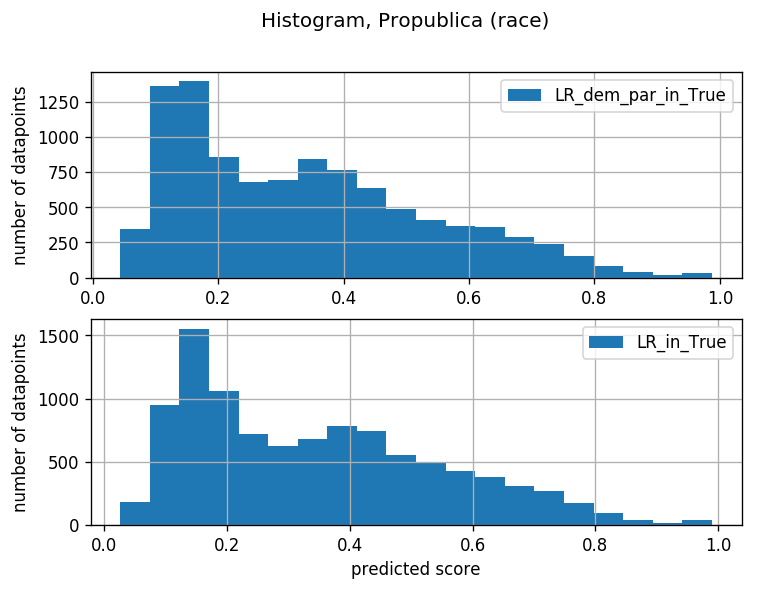

In [3]:
fig, plots = plt.subplots(2, 1, figsize=(7, 5), dpi=120)
#plot.plot(results_propublica['UGP_eq_opp_in_False']['race'][0]['pred_mean'], propublica['race'][0]['ytest'], 'o')
plots[0].hist(results['ULR_dem_par_in_True']['race'][0]['pred_mean'], bins=20, label='LR_dem_par_in_True')
plots[1].hist(results['ULR_in_True']['race'][0]['pred_mean'], bins=20, label='LR_in_True')
plots[1].set_xlabel('predicted score')
for plot in plots:
    plot.set_ylabel('number of datapoints')
    #plot.set_xlim((.47, .54))
    plot.grid()
    plot.legend()
fig.suptitle('Histogram, Propublica (race)')
#fig.savefig('histogram_adult_race_lr.svg')

In [6]:
conf_acc = apply_to_merged_splits(meta_confidence_and_accuracy(15), results, dataset)

In [7]:
conf_acc_s0 = apply_to_merged_splits(meta_confidence_and_accuracy(15, s=0), results, dataset)
conf_acc_s1 = apply_to_merged_splits(meta_confidence_and_accuracy(15, s=1), results, dataset)

In [8]:
confidence, accuracy = conf_acc['ULR_dem_par_in_False']['race']
#scale = max(confidence.max() - 0.5, 0.5 - confidence.min())
#confidence = 0.5 * (confidence - 0.5) / scale + 0.5

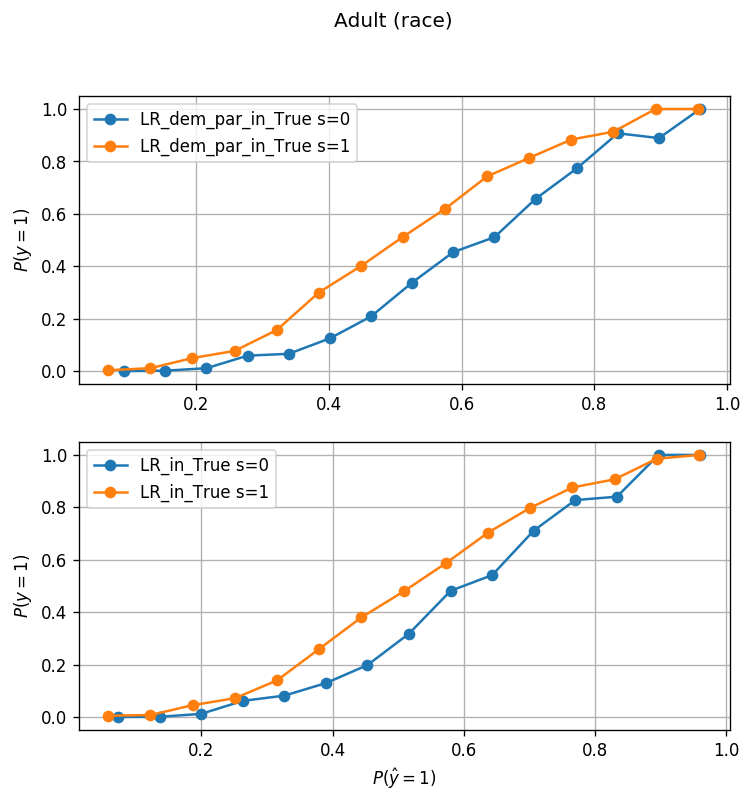

In [9]:
fig, plots = plt.subplots(2, 1, figsize=(7, 7), dpi=120)
plots[0].plot(*conf_acc_s0['ULR_dem_par_in_True']['race'], 'o-', label='LR_dem_par_in_True s=0')
plots[0].plot(*conf_acc_s1['ULR_dem_par_in_True']['race'], 'o-', label='LR_dem_par_in_True s=1')
#plot.plot(*conf_acc['UGP_eq_opp_in_False']['race'][1], 'o-', label='UGP_eq_opp_in_False')
plots[1].plot(*conf_acc_s0['ULR_in_True']['race'], 'o-', label='LR_in_True s=0')
plots[1].plot(*conf_acc_s1['ULR_in_True']['race'], 'o-', label='LR_in_True s=1')
#plot.plot(*conf_acc['UGP_in_False']['race'][1], 'o-', label='UGP_in_False', color="red")
#plot.plot([0.48, 0.52], [0.48, 0.52])
fig.suptitle('Adult (race)')
plots[1].set_xlabel('$P(\\hat{y}=1)$')
for plot in plots:
    plot.set_ylabel('$P(y=1)$')
    plot.grid()
    plot.legend()
    #plot.set_xlim((.47, .54))
#fig.savefig('confidence_adult_race_by_s_lr.svg')

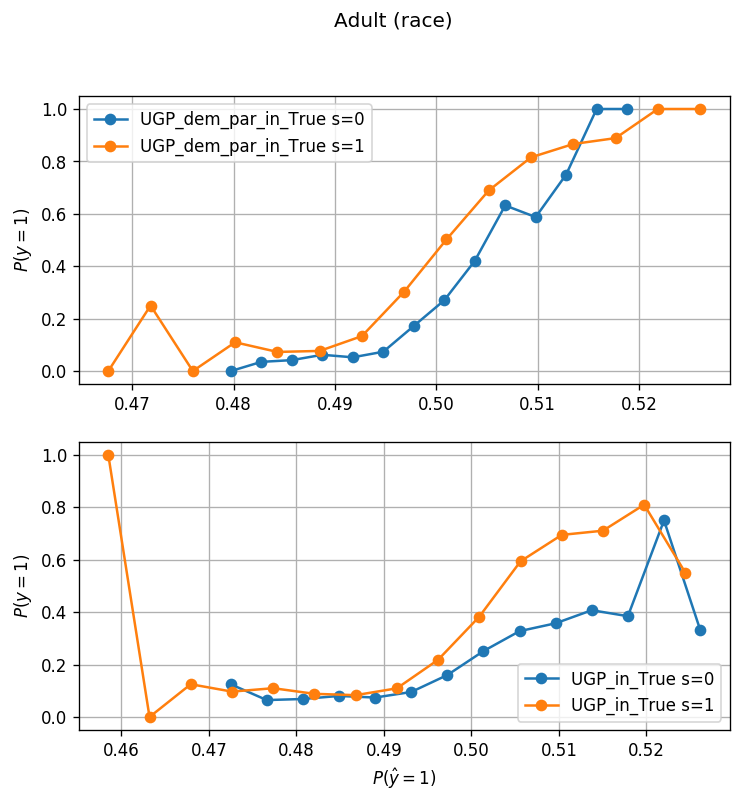

In [22]:
fig, plots = plt.subplots(2, 1, figsize=(7, 7), dpi=120)
plots[0].plot(*conf_acc_s0['UGP_dem_par_in_True']['race'], 'o-', label='UGP_dem_par_in_True s=0')
plots[0].plot(*conf_acc_s1['UGP_dem_par_in_True']['race'], 'o-', label='UGP_dem_par_in_True s=1')
#plot.plot(*conf_acc['UGP_eq_opp_in_False']['race'][1], 'o-', label='UGP_eq_opp_in_False')
plots[1].plot(*conf_acc_s0['UGP_in_True']['race'], 'o-', label='UGP_in_True s=0')
plots[1].plot(*conf_acc_s1['UGP_in_True']['race'], 'o-', label='UGP_in_True s=1')
#plot.plot(*conf_acc['UGP_in_False']['race'][1], 'o-', label='UGP_in_False', color="red")
#plot.plot([0.48, 0.52], [0.48, 0.52])
fig.suptitle('Adult (race)')
plots[1].set_xlabel('$P(\\hat{y}=1)$')
for plot in plots:
    plot.set_ylabel('$P(y=1)$')
    plot.grid()
    plot.legend()
    #plot.set_xlim((.47, .54))
fig.savefig('confidence_adult_race_by_s.svg')

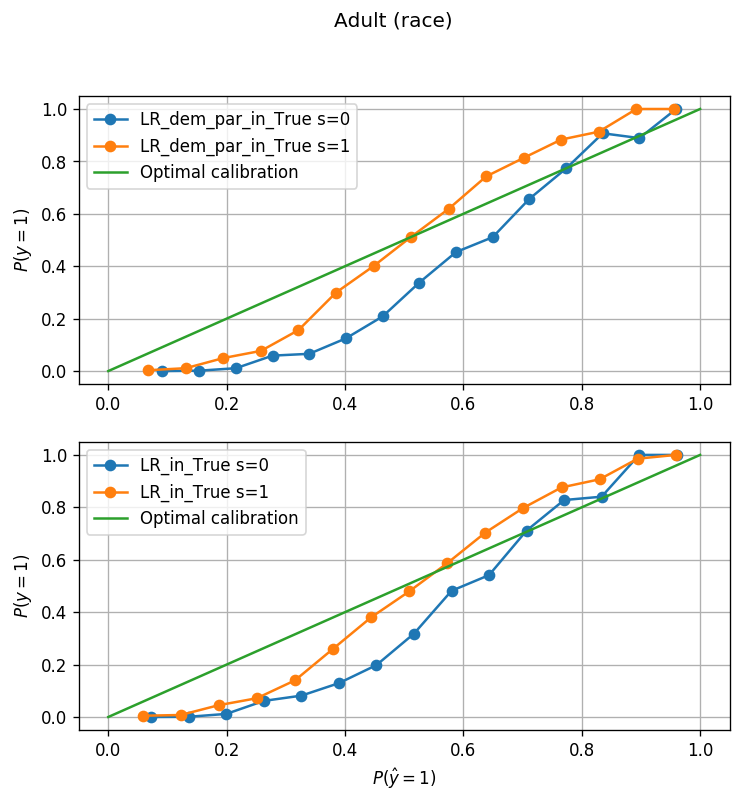

In [10]:
for plot in plots:
    plot.plot([0, 1], [0, 1], label='Optimal calibration')
    plot.legend()
fig.savefig('confidence_adult_race_with_optimal_scaled_lr.svg')
fig

In [4]:
def di_and_accuracy(result, dataset):
    """Compute TPR difference and accuracy"""
    # gather data
    scores = result['pred_mean']
    labels = dataset['ytest']
    sensitive = dataset['stest']
    # P(yhat=1|y=1, s=0)
    pr_s0 = np.mean(scores[sensitive == 0] > 0.5)
    # P(yhat=1|y=1, s=1)
    pr_s1 = np.mean(scores[sensitive == 1] > 0.5)
    accuracy = np.mean((scores > 0.5).astype(np.int) == labels)
    return pr_s0 / pr_s1, accuracy
apply_to_all(di_and_accuracy, results, dataset)

{'ULR_dem_par_in_False': {'race': {0: (0.6210831721470018, 0.8310293386374937),
   1: (0.6001307248467364, 0.827349577324714),
   2: (0.6457995823883069, 0.8277473893585281),
   3: (0.6734275084292524, 0.8268523122824465),
   4: (0.6188653086375004, 0.8335156638488315)}},
 'ULR_dem_par_in_True': {'race': {0: (0.9337192879100294, 0.8302337145698657),
   1: (0.9048332019963226, 0.8310293386374937),
   2: (0.9918591352706252, 0.8295375435106912),
   3: (0.9530371513614816, 0.8332173048234709),
   4: (0.9424883995220138, 0.8388861263053208)}},
 'ULR_in_False': {'race': {0: (0.5718355772681836, 0.8294380905022377),
   1: (0.567017292214519, 0.8316260566882148),
   2: (0.584388150000845, 0.8242665340626554),
   3: (0.6136256090294087, 0.825957235206365),
   4: (0.5775773460787337, 0.8392839383391347)}},
 'ULR_in_True': {'race': {0: (0.8371805165261609, 0.8309298856290402),
   1: (0.7866452562558544, 0.8349080059671805),
   2: (0.8863657255184799, 0.8292391844853306),
   3: (0.836757573541956